<a href="https://colab.research.google.com/github/Vaibhav-sa30/Business-Analytics-Repo/blob/main/ChiGOF_UNIFORM_May2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATA =

In [1]:
# @title Importing Basic Packages and Reading the Data
import numpy as np
import pandas as pd

df = pd.read_excel('data_Uniform.xlsx')

print(df.head())
print(df.shape)

         obs
0  54.507318
1  52.183131
2  59.587585
3  52.951728
4  53.302821
(51, 1)


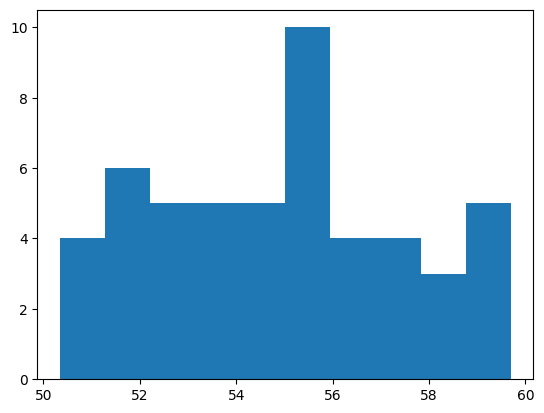

In [2]:
# @title Visualize the data as a histogram
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()


In [3]:
# @title Get the Descriptive statistics for the data
df.describe()

,obs
count,51.000000
mean,54.931441
std,2.633428
min,50.340227
25%,52.979121
50%,55.079462
75%,56.820487
max,59.695597


In [4]:
# @title Some additional descriptive statistics
stats_labels = ['Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))


{('Kurt Observed', -0.83), ('Variance Observed', 6.93), ('Skew Observed', 0.18)}


In [5]:
# @title Importing the required statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

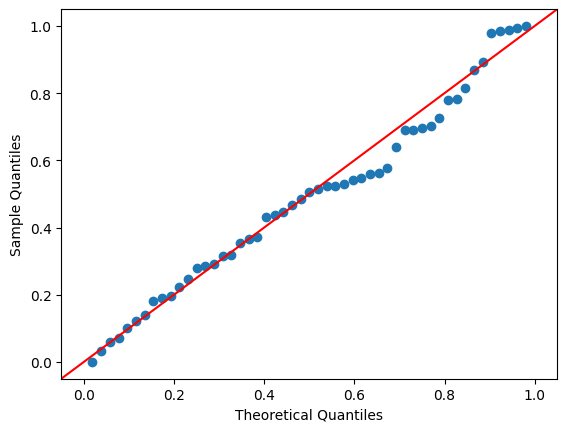

In [14]:
# @title Developing a qq plot to compare the quantiles (amplify the differences in the tails)
sm.qqplot(df['obs'], stats.uniform, fit = True, line = '45')
plt.show()


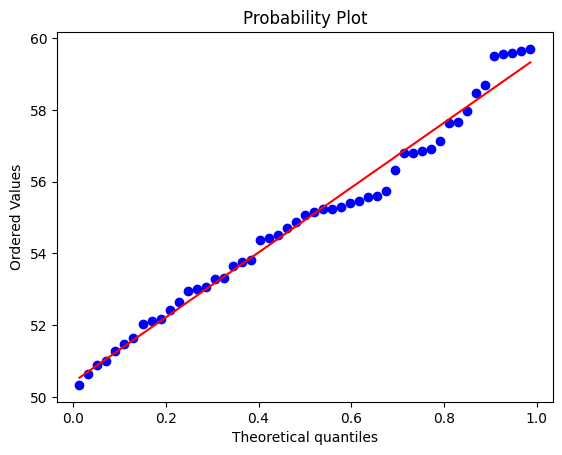

In [15]:
# @title Developing a qq plot to compare the quantiles (amplify the differences in the centre)
stats.probplot(df['obs'], dist='uniform', plot=plt)
plt.show()


In [ ]:
# NULL HYPOTHESIS: The given data follows Uniform distribution.
# ALTERNATE HYPOTHESIS: The given data does not follow Uniform distribution

def var_hypo()


In [16]:
#Step-1 in CHi-Square GOF: Create Bins
df['Bins'] = pd.cut(df['obs'], bins=10)
print(df)

          obs              Bins
0   54.507318  (54.082, 55.018]
1   52.183131  (51.276, 52.211]
2   59.587585   (58.76, 59.696]
3   52.951728  (52.211, 53.147]
4   53.302821  (53.147, 54.082]
5   54.383157  (54.082, 55.018]
6   55.394090  (55.018, 55.953]
7   59.637172   (58.76, 59.696]
8   53.811463  (53.147, 54.082]
9   52.035259  (51.276, 52.211]
10  53.763910  (53.147, 54.082]
11  59.488890   (58.76, 59.696]
12  56.798223  (55.953, 56.889]
13  55.727858  (55.018, 55.953]
14  54.434550  (54.082, 55.018]
15  55.162684  (55.018, 55.953]
16  51.287706  (51.276, 52.211]
17  54.884016  (54.082, 55.018]
18  50.340227  (50.331, 51.276]
19  51.009715  (50.331, 51.276]
20  53.006514  (52.211, 53.147]
21  52.653531  (52.211, 53.147]
22  56.323987  (55.953, 56.889]
23  51.467548  (51.276, 52.211]
24  56.900738  (56.889, 57.825]
25  58.482138   (57.825, 58.76]
26  57.659965  (56.889, 57.825]
27  57.974599   (57.825, 58.76]
28  52.115398  (51.276, 52.211]
29  55.079462  (55.018, 55.953]
30  50.6

In [17]:
#Step-2 in CHi-Square GOF: Count Number of Observations in Each Bin
df_2 = pd.DataFrame()
df_2 ["Observed Frequency"] = (df.groupby('Bins').count())
df_2

,Observed Frequency
Bins,
"(50.331, 51.276]",4
"(51.276, 52.211]",6
"(52.211, 53.147]",5
"(53.147, 54.082]",5
"(54.082, 55.018]",5
"(55.018, 55.953]",10
"(55.953, 56.889]",4
"(56.889, 57.825]",4
"(57.825, 58.76]",3


In [18]:
#Step-3 in CHi-Square GOF: Determine the Expected Number of Observations in Each Bin
mean = df_2["Observed Frequency"].mean()
df_2["Expected Frequency"] = mean
df_2


,Observed Frequency,Expected Frequency
Bins,,
"(50.331, 51.276]",4,5.1
"(51.276, 52.211]",6,5.1
"(52.211, 53.147]",5,5.1
"(53.147, 54.082]",5,5.1
"(54.082, 55.018]",5,5.1
"(55.018, 55.953]",10,5.1
"(55.953, 56.889]",4,5.1
"(56.889, 57.825]",4,5.1
"(57.825, 58.76]",3,5.1


<Axes: xlabel='Bins'>

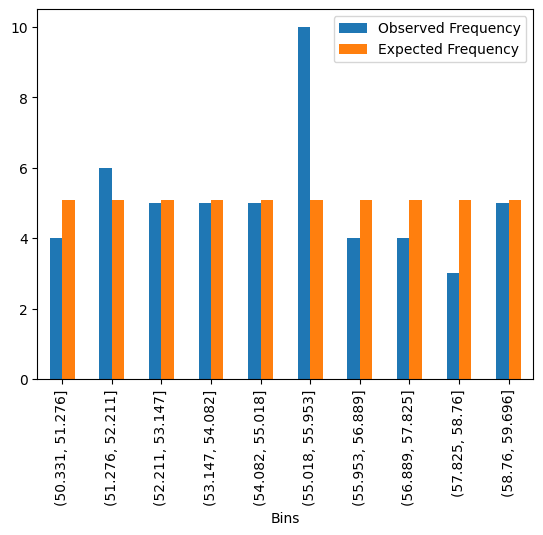

In [19]:
# @title Observed vs Expected Frequency

df_2.plot.bar()


In [20]:
#Step-4A in CHi-Square GOF: Determine the Test Statistics and P-Value
chisquare(df_2['Observed Frequency'], df_2['Expected Frequency'])


Power_divergenceResult(statistic=6.450980392156864, pvalue=0.6940703597580011)

In [ ]:
# GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4A

# REJECT the Null if the p-value < level of significant
# DO NOT REJECT the Null if the p-value >= level of significant

# Say the level of significance is 5%, then for given data set, p-value (0.694)>>0.05 --> DO NOT REJECT THE NULL

# Note: For any level of significance ~>70%, we do not reject the null for the current data set.

In [ ]:
#Step-4B in CHi-Square GOF: Determine the Tabulated Value of the Test Statistic
chi2.ppf(0.95,len(df_2)-2-1)

# GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4B

# REJECT the Null if the "Tabluated Test Statistic Value" < "Computed Test Statistic Value"
# DO NOT REJECT the Null if the "Tabluated Test Statistic Value" >= "Computed Test Statistic Value"


14.067140449340169

In [34]:
def greet(x):
  return f'Hi {x}! How are you?'

greet('Vaibhav')

'Hi Vaibhav! How are you?'

In [36]:
def fact(n):
  if n == 0:
    return 1
  else:
    return n * fact(n-1)

fact(1)

1

In [53]:
def test(df):
  return df.describe()

print(test(df).iloc[5], '\n\n')
print(test(df))

obs    55.079462
Name: 50%, dtype: float64 


             obs
count  51.000000
mean   54.931441
std     2.633428
min    50.340227
25%    52.979121
50%    55.079462
75%    56.820487
max    59.695597


In [54]:
import numpy as np
from scipy import stats

def fit_distribution(data):
    """Fit theoretical distributions to the input data and assess goodness of fit."""
    # Define theoretical distributions to test
    distributions = {
        'Normal': stats.norm,
        'Exponential': stats.expon,
        # Add more distributions as needed
    }

    # Perform fitting and testing for each distribution
    results = {}
    for name, dist in distributions.items():
        # Fit the distribution to the data
        params = dist.fit(data)

        # Perform goodness of fit test (e.g., Kolmogorov-Smirnov test)
        _, p_value = stats.kstest(data, dist.cdf, args=params)

        # Store results
        results[name] = {
            'Params': params,
            'Kolmogorov-Smirnov Test': {'p-value': p_value}
            # Add more statistical tests as needed
        }

    return results

# Example usage
data = np.random.normal(loc=0, scale=1, size=1000)  # Example data (normal distribution)
fit_results = fit_distribution(data)
for distribution, results in fit_results.items():
    print(f"Results for {distribution}:")
    print(results)
    print()


Results for Normal:
{'Params': (-0.005215592095365985, 0.9957734212738791), 'Kolmogorov-Smirnov Test': {'p-value': 0.9408220238386793}}

Results for Exponential:
{'Params': (-3.1870504395938313, 3.1818348474984655), 'Kolmogorov-Smirnov Test': {'p-value': 7.843065075408461e-115}}



In [55]:
# @title Step 1: Check the datatype of our variable.

In [56]:
# @title Step 2: If Discrete or Categorical -> Choose Chi-square fit

In [57]:
# @title Step 3:

In [62]:
# @title Write a function that calculates number of upper case letters, number of lower case letters, number of characters and number of words.

def ULCW():
  sentence = input('Enter your sentence: ')
  upper_num = 0
  lower_num = 0
  for i in sentence:
    if i.isupper():
      upper_num += 1
    elif i.islower():
      lower_num += 1

  return upper_num, lower_num

ULCW()

Enter your sentence: I am strong.


(1, 8)

In [70]:
def ULCW():
  sentence = input('Enter your sentence: ')
  upper_num = 0
  lower_num = 0
  word_count = 0
  for i in sentence:
    if i.isupper():
      upper_num += 1
    elif i.islower():
      lower_num += 1
  for word in sentence:
    if word == ' ':
      word_count += 1
  word_count += 1

  return f'Number of upper case letters: {upper_num}, Number of lower case letters: {lower_num}, Number of characters: {len(sentence)}, Number of words: {word_count}'

ULCW()

Enter your sentence: I am greatest english speaker


'Number of upper case letters: 1, Number of lower case letters: 24, Number of characters: 29, Number of words: 5'

In [95]:
import numpy as np

def area_param():
  shape = input('Enter the shape: ')
  rectangle = ['rectangle', 'Rectangle', 'RECTANGLE', 'rECTANGLE']
  circle = ['circle', 'CIRCLE', 'Circle', 'cIRCLE']
  if shape in rectangle:
    l = int(input('Enter the length of rectangle: '))
    b = int(input('Enter the breadth of rectangle: '))
    area_para = input('Do you want area or parameter? ')
    if area_para in ['area', 'Area', 'AREA', 'aREA']:
      area = l*b
      return f'area of rectangle: {area: .2f} sq. units'
    elif area_para in ['para', 'param', 'Para', 'PARA', 'PARAM', 'Param', 'Parameter', 'PARAMETER', 'parameter']:
      param = 2*(l+b)
      return f'Parameter of rectangle: {param: .2f} units'
  elif shape in circle:
    r = int(input('Enter the radius of the circle: '))
    area_para = input('Do you want area or parameter? ')
    if area_para in ['area', 'Area', 'AREA', 'aREA']:
      area = np.pi*(r**2)
      return f'area of circle: {area: .2f} sq. units'
    elif area_para in ['para', 'param', 'Para', 'PARA', 'PARAM', 'Param', 'Parameter', 'PARAMETER', 'parameter']:
      param = 2*(np.pi)*r
      return f'Parameter of circle: {param: .2f} units'
  else:
    print('Please enter valid input')

area_param()

Enter the shape: rectangle
Enter the length of rectangle: 2
Enter the breadth of rectangle: 3
Do you want area or parameter? area


'area of rectangle:  6.00 sq. units'

In [1]:
def is_leap_year(year):
    """Check if a year is a leap year."""
    if year % 100 == 0:  # If year is divisible by 100
        if year % 400 == 0:  # If divisible by 400, it's a leap year
            return True
        else:
            return False
    elif year % 4 == 0:  # If year is not divisible by 100 but divisible by 4
        return True
    else:
        return False

is_leap_year(2021)

False